<a href="https://colab.research.google.com/github/ShchA317/AIS/blob/lab4/lab4/lab4_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import Callback
from keras import regularizers
from keras import optimizers
import warnings
warnings.filterwarnings("ignore")

from functools import partial

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *

import numpy as np

In [ ]:
#import os
#os.environ['THEANO_FLAGS'] = "device=cuda,force_device=True,floatX=float32"
#import theano
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import Callback
from keras import regularizers
from keras import optimizers

from functools import partial

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *

import numpy as np

In [ ]:
# Dot count
samples = 1000
test_n = 200

In [ ]:
# X interval
x_int = (-9, 9)
# Y interval
y_int = (-1, 1)

In [ ]:
# Generate
data = [(np.random.random() * (x_int[1] - x_int[0]) + x_int[0],
                  np.random.random() * (y_int[1] - y_int[0]) + y_int[0]) for i in range(samples + test_n)]
#print(data)
train_data = np.array(data[test_n:])
test_data = np.array(data[:test_n])
print(train_data)

[[-4.88905396 -0.97954026]
 [-4.14984037 -0.24619061]
 [-6.08837719  0.15162914]
 ...
 [-1.82401694 -0.15247588]
 [ 3.18344261 -0.50602687]
 [ 6.62635078 -0.44406686]]


In [ ]:
def main_func(x):
    return np.cos(x)
def main_func_noisy(x):
    return main_func(x) + np.cos(4*x + 1) / 5

def result_func(xy):
    return main_func(xy[0]) > xy[1]

def result_func_noisy(xy):
    return main_func_noisy(xy[0]) > xy[1]

In [ ]:
train_answers = np.apply_along_axis(result_func_noisy, arr=train_data, axis=1)
#answers = np.reshape(answers, (samples,1))
print(train_answers.shape)

test_answers = np.apply_along_axis(result_func, arr=test_data, axis=1)
print(test_answers.shape)

(1000,)
(200,)


In [ ]:
train_data_true = train_data[train_answers]
train_data_false = train_data[np.logical_not(train_answers)]
print(train_data_true.shape)
print(train_data_false.shape)

(522, 2)
(478, 2)


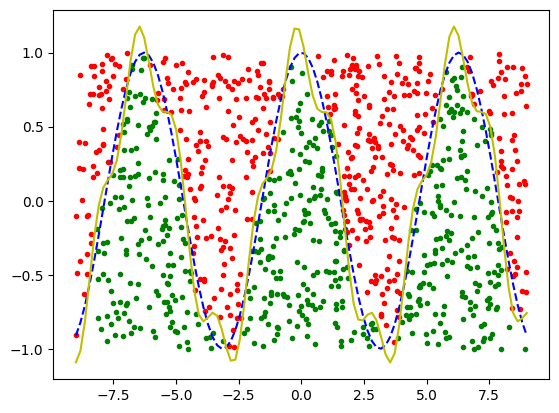

In [ ]:
fig, ax = plt.subplots()

xx = np.linspace(*x_int, 100)

ax.plot(train_data_true[:,0], train_data_true[:,1], 'g.')
ax.plot(train_data_false[:,0], train_data_false[:,1], 'r.')
ax.plot(xx, main_func(xx), 'b--')
ax.plot(xx, main_func_noisy(xx), 'y-')

In [ ]:
def plot_accuracy(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
def plot_contour_graph(model):
    xx = np.linspace(*x_int, 100)
    yy = np.linspace(*y_int, 200)

    xm, ym = np.meshgrid(xx, yy)
    xys = np.array([xm, ym]).reshape((2, -1))

    z_actual = result_func(xys).reshape(200,100)

    xys = np.moveaxis(xys, 0, 1)
    z = model.predict(xys).reshape(200, 100)


    plt.contourf(xm, ym, z)
    plt.title('Neural net vision of the function')
    plt.colorbar()
    plt.show()

    plt.contourf(xm, ym, z_actual)
    plt.title('Actual function')
    plt.colorbar()
    plt.show()

In [ ]:
from tensorflow.keras import optimizers

style = {'description_width': 'initial'}
@interact_manual(
    n_layers = IntSlider(min=0, max=4, value=2, description='Слоев: '),
    layer1_size = IntSlider(min=0, max=20, value=6, description='Neurons count in layer 1: ', style=style),
    layer2_size = IntSlider(min=0, max=20, value=3, description='Neurons count in layer 2: ', style=style),
    layer3_size = IntSlider(min=0, max=20, value=0, description='Neurons count in layer 1: ', style=style),
    layer4_size = IntSlider(min=0, max=20, value=0, description='Neurons count in layer 1: ', style=style),
    layer1_type = Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 1 activation type: ', style=style),
    layer2_type = Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 2 activation type: ', style=style),
    layer3_type = Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 3 activation type: ', style=style),
    layer4_type = Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='relu',
                          description='Layer 4 activation type: ', style=style),
    layer_out_type = Dropdown(options=['softmax', 'relu', 'tanh', 'sigmoid', 'linear'], value='sigmoid',
                          description='Output layer activation type: ', style=style),
    loss_func = Dropdown(options={
        'Standard deviation': 'mse',
        'Mean absolute deviation': 'mae',
        'Binary crossentropy': 'binary_crossentropy'
    }, value='binary_crossentropy', description='Loss function: ', style=style),
    epochs = IntSlider(min=10, max=10000, step=10, value=300, description='Epoch count: ', style=style),
    batch_size = IntSlider(min=0, max=len(data), value=100, description='Batch size: ', style=style),
    lr = ToggleButtons(options=["-0.1", "0", "0.001", "0.01", "0.05", "0.1", "0.5", "1", "5"],
                               value="0.01", description='Learn rate: ', style=style),
    l1=ToggleButtons(options=["-0.1", "0", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"],
                               value="0.0001", description='Regularization  L1: ', style=style),
    l2=ToggleButtons(options=["-0.1", "0", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"],
                               value="0.0001", description='Regularization  L2: ', style=style)
)
def interactive_learning(n_layers, loss_func, batch_size, lr, l1, l2, layer_out_type, epochs,
                         layer1_size, layer2_size, layer3_size, layer4_size,
                         layer1_type, layer2_type, layer3_type, layer4_type):
    layer_sizes = [layer1_size, layer2_size, layer3_size, layer4_size]
    layer_types = [layer1_type, layer2_type, layer3_type, layer4_type]
    lr = float(lr)
    l1 = float(l1)
    l2 = float(l2)

    model = Sequential()

    if n_layers == 0:
        model.add(Dense(1, activation=layer_out_type,
                        input_shape=(2,), kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
    else:
        model.add(Dense(layer_sizes[0], activation=layer_types[0],
                        input_shape=(2,), kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
        for i in range(1, n_layers):
            model.add(Dense(layer_sizes[i], activation=layer_types[i],
                           kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))
        model.add(Dense(1, activation=layer_out_type, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)))

    model.compile(
     optimizer = optimizers.SGD(lr=lr),
     loss = loss_func,
     metrics = ["accuracy"]
    )


    history = model.fit(
     train_data, train_answers,
     epochs=epochs,
     batch_size=batch_size,
     validation_data=(test_data, test_answers),
     verbose=0
    )

    print('Accuracy: ', history.history['val_accuracy'][-1])
    plot_accuracy(history)
    plot_contour_graph(model)

interactive(children=(IntSlider(value=2, description='Слоев: ', max=4), Dropdown(description='Loss function: '…

-0.1 -0.1 : 62 \
-0.1 0    : 72\
0.001 -0.1 : 74 \
0.001 0.0005 : 75 \